<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что исправил задание:) Начнем с начала. Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<div class="alert alert-block alert-info">Добрый день! Спасибо за комментарии и советы.</div>

Добрый день! Очень странно что тетрадка загрузилась не полностью. Отправляю вам полную версию.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Стоит делать краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

</div>

# Проектная работа "Анализ продаж игр для интернет-магазина «Стримчик»"

## Шаг 1

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Эти данные собраны в games.csv.
Описание данных games.csv

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Подключаю библиотеки

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

<div class="alert alert-block alert-info">Перед отправкой работы для проверки, я запускал все ячейки начиначя с первой. Перезапустить нотебук побоялся так, как платформа работает не стабильбно.</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
# Отключаю предупреждения
import warnings
warnings.filterwarnings('ignore')

## Шаг 2

Читаю нужный файл

In [2]:
df = pd.read_csv('/datasets/games.csv')

Вывожу первые 10 строк датасета

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски в данных могу появиться по разным причинам. Из-за случайных причин: ошибки ввода, ошибки получения данных и не случайных: отсутствие некоторых данных, сокрытие некоторых данных. Не значительную часть сторок с пропущенными данными можно удалить, можно попробовать восстановить пропущенные данные исходя из значений других столбцов или заменить пропуски на 0, среднее или медиану.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен. Не забывай делать выводы по каждому пункту анализа. 

</div>

## Шаг 3 Подготовка данных

Заменяю названия столбцов

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
name_columns = df.columns
new_columns = []
for item in name_columns:
    new_columns.append(item.lower())
print(new_columns)      

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [7]:
df.set_axis(new_columns, axis = 'columns', inplace = True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Данный метод позволяет нам автоматизировать процесс приведения названий столбцов к нижнему регистру. Так исключается вероятность опечаток. 

</div>

Преобразую данные в нужные типы. Столбцы 'year_of_release' в тип int64 так, как  значения этого столбца целое число. Столбец 'user_score' в числовой формат так, как оценка пользователей это натуральное число.

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd обозначает "подлежит уточнению" можно спокойно заменить на NaN

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

Проверю наличе дубликатов строк 

In [11]:
df.duplicated().sum()

0

Дубликатов нет

In [12]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные по старым двум играм без названия и без жанра без рейтингов не сильно повлияют на результаты, поэтому я удалю эти строки. 269 строк без года выпуска игры это 1,6% данных их очень жалко, но какой год мы не подставлю это может значительно повлиять на результаты анализа. Поэтому эти строки удаляю тоже.

In [13]:
df.dropna(subset = ['name','year_of_release'],
inplace = True)

In [14]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

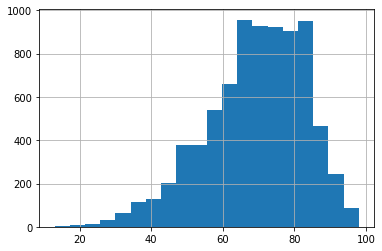

In [15]:
df['critic_score'].hist(bins=20)
plt.show()

In [16]:
df['critic_score'].mean()


68.99436302142053

In [17]:
df['critic_score'].median()

71.0

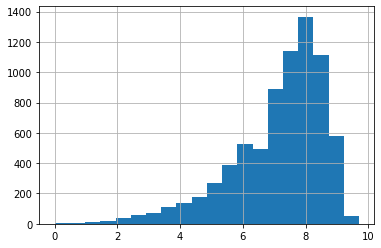

In [18]:
df['user_score'].hist(bins=20)
plt.show()

In [19]:
df['user_score'].mean()

7.126329894144447

In [20]:
df['user_score'].median()

7.5

Считаю пустые значения  в столбцах 'critic_score' и 'user_score' заполнять не надо. Удалять строки с пустыми значениями в этих столбцах тоже не надо. При работе с рейтингами будем учитывать только не пустые значения.

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменяю пустые значения в столбце 'rating' на 'unknown'

In [22]:
df['rating'] = df['rating'].fillna('unknown')

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Смотрю результат

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [25]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

## Шаг 4. Исследовательский анализ данных

In [26]:
#Считаю сколько игр выпускалось в разные годы
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [27]:
df.query('year_of_release < 1997').groupby('year_of_release')['name'].count().sum()

968

До 2008 года количество выпускаемых игр росло, с 2008 года стало постепенно уменьшаться. До 1997 года было выпущено 968 игр. Думаю данные до 1997 года не очень важны.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь, с чем связан спад в индустрии последних лет?

</div>

<div class="alert alert-block alert-info">Думаю это не спад. Это перераспределение рынка связаное с появлением смартфонов и планшетов Apple и Android со своими онлайн магазинами, развитием браузерных игр, изменением принципов монетизации в играх.</div>

In [28]:
#Boe платформы с наибольшими продажами
df_platform = df.groupby('platform').agg({'total_sales': 'sum'}).query('total_sales > 100')
print(df_platform)

          total_sales
platform             
3DS            257.81
DS             802.78
GB             254.43
GBA            312.88
GC             196.73
N64            218.01
NES            251.05
PC             255.76
PS             727.58
PS2           1233.56
PS3            931.34
PS4            314.14
PSP            289.53
SNES           200.04
Wii            891.18
X360           961.24
XB             251.57
XOne           159.32


Создаю датафрейм с ограничением по годам и высокодоходным платформам

In [29]:
df_new = df.query('year_of_release > 1996')

In [30]:
platform_big_inc = df_platform.index

In [31]:
df_new = df_new.query('platform in @platform_big_inc')

In [32]:
#Строю распредление по годам
df_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)

platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,
1997,NaN,NaN,6.37,NaN,NaN,39.50,11.27,136.17,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN
1998,NaN,NaN,26.90,NaN,NaN,49.24,3.26,169.49,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN
1999,NaN,NaN,38.00,NaN,NaN,57.87,4.74,144.53,NaN,NaN,NaN,NaN,0.26,NaN,NaN,NaN,NaN
2000,NaN,NaN,19.76,0.07,NaN,33.97,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,9.24,61.53,26.34,3.25,5.47,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003,NaN,NaN,NaN,56.67,50.61,NaN,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004,NaN,17.27,NaN,77.91,28.82,NaN,10.39,NaN,211.81,NaN,NaN,7.06,NaN,NaN,NaN,65.42,NaN
2005,NaN,130.14,NaN,33.86,27.62,NaN,4.37,NaN,160.66,NaN,NaN,43.84,NaN,NaN,8.25,49.08,NaN


Очень популярные раньше платформы у которых сейчас продажи 0: PS2, PS, DS, GBA, PSP, XB. Платформы появляются и исчезают примерно за 10-12 лет. Исключение платформа PC она "вечная". 
Чтобы исключить значимое искажение распределения по платформам в 2016 году, надо использовать данные с 2013 года.
В 2016 году продаются игры на семи платформах, причем на платформах Wii и X360 падают и незначительны. На платформах 3DS, PC, PS3 падают, а на платформах PS4 и XOne растут. Лидируют по продажам PS4, XOne, 3DS и PC. Потенцильно прибыльные платформы PS4, XOne и PC.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по таблице, рассчитывая периоды вручную. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

Делаю вычисление средней продолжительности существования платформы. Платформу PC из вычислений исключаю.
Также исключаю слишком новую PS4 и старые SNES, GB, N64.

In [33]:

df_platform_life = df_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum)
platform_life = []
for pl in df_platform_life.columns:
    if pl not in ['PC', 'PS4', 'SNES', 'GB', 'N64']:
        platform_life.append(df_platform_life[pl].count())
print('Cредняя продолжительности существования платформы', np.mean(platform_life))

Cредняя продолжительности существования платформы 9.083333333333334


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно вышеназванные платформы мы и можем назвать перспективными на 2017 год. 

</div>

In [34]:
#Выбираю данные которыми буду пользоваться в дальнейшем
data = df.query('year_of_release > 2012 & platform in ("3DS", "PC", "PS4", "XOne")')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Так в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

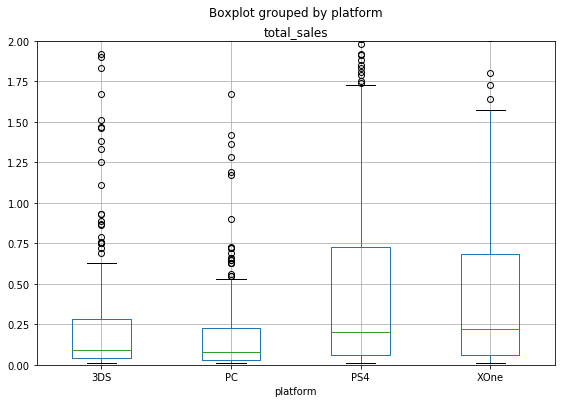

In [35]:
#Строю ящик с усами
data.boxplot(column='total_sales', by='platform', figsize=(9, 6))
plt.ylim(0, 2)
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

Разница в продажах по платформам не велика. 3DS, PC дешевле, потому что 3DS уже оносительно старая платформа, а РС это не специализированная под игры платформа. А PS4, XOne дороже так, это новые платформы специально сделанные для игр. Средние значения ведут себя также.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

In [36]:
# Готовлю данные для опредления завасимости продаж от отзавыв
data_corr = data.query('platform in "PS4"')
data_corr = data_corr.dropna(subset = ['critic_score','user_score'])

In [37]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
name               249 non-null object
platform           249 non-null object
year_of_release    249 non-null Int64
genre              249 non-null object
na_sales           249 non-null float64
eu_sales           249 non-null float64
jp_sales           249 non-null float64
other_sales        249 non-null float64
critic_score       249 non-null float64
user_score         249 non-null float64
rating             249 non-null object
total_sales        249 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 25.5+ KB


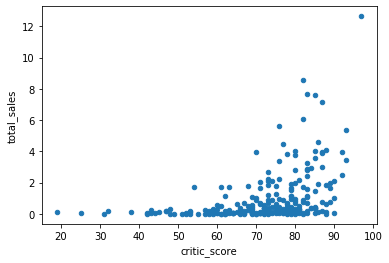

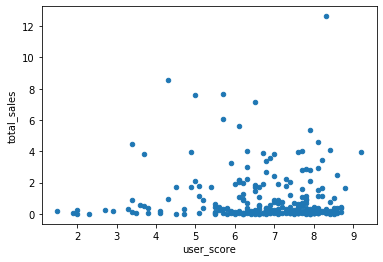

In [38]:
#Строю графики распределения
data_corr.plot(x='critic_score', y='total_sales', kind='scatter')
data_corr.plot(x='user_score', y='total_sales', kind='scatter')

In [39]:
#Считаю коэф. корреляции
print(data_corr['total_sales'].corr(data_corr['user_score']))
print(data_corr['total_sales'].corr(data_corr['critic_score']))

-0.03362497596528878
0.40589480145836687


Зависимость продаж от отзывов прользователей отсутстствует. Зависимость продаж от отзывов экспертов есть, но умеренная.
Считаю на других платформах зависимости анологичные.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Стоит рассмотреть и другие платформы. Делать выводы лишь по одной из них мы не можем. 

</div>

Разбираюсь с полученным результатомю На гафиках видно большое количество продаж близких к нулю. Удалю эти продажи.

-0.07833984187444354
0.2725328965592191


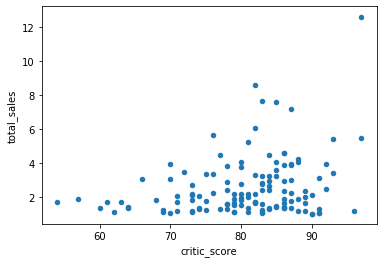

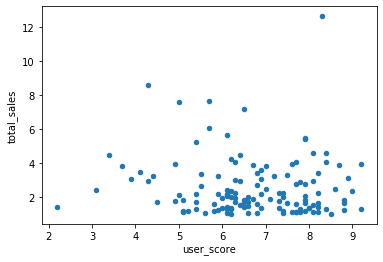

In [40]:
data_corr = data.query('total_sales>1')
data_corr.plot(x='critic_score', y='total_sales', kind='scatter')
data_corr.plot(x='user_score', y='total_sales', kind='scatter')
print(data_corr['total_sales'].corr(data_corr['user_score']))
print(data_corr['total_sales'].corr(data_corr['critic_score']))

Это не помогло. Построю графики для других платформ.

Платформа PS4
Кореляция продаж и рейтинга критиков 0.40589480145836687
Кореляция продаж и рейтинга пользователей -0.03362497596528878


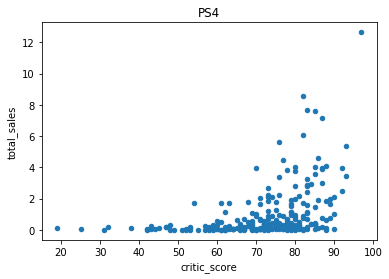

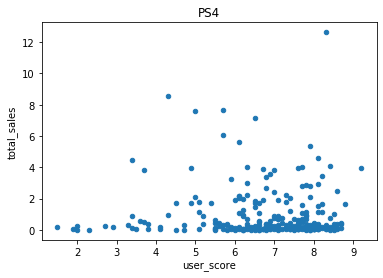

Платформа XOne
Кореляция продаж и рейтинга критиков 0.4104220356129637
Кореляция продаж и рейтинга пользователей -0.09400318326920852


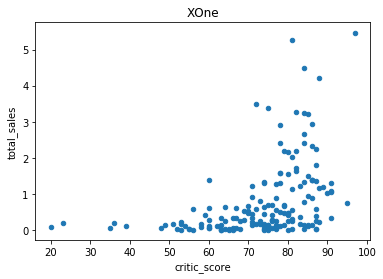

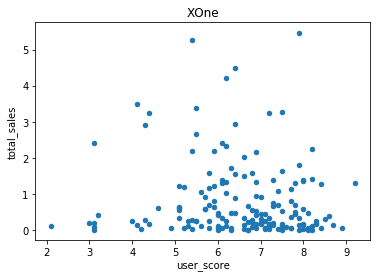

Платформа 3DS
Кореляция продаж и рейтинга критиков 0.33923492878531464
Кореляция продаж и рейтинга пользователей 0.2729904366942444


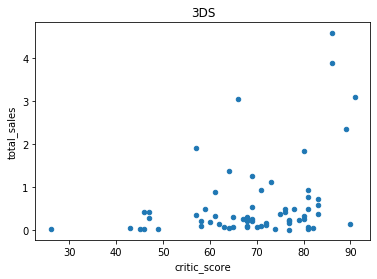

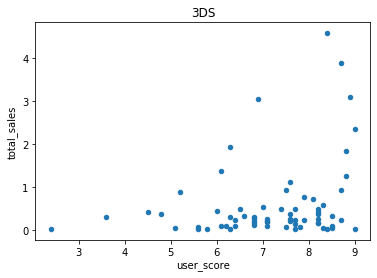

Платформа PC
Кореляция продаж и рейтинга критиков 0.19412407903472953
Кореляция продаж и рейтинга пользователей -0.1092350273617178


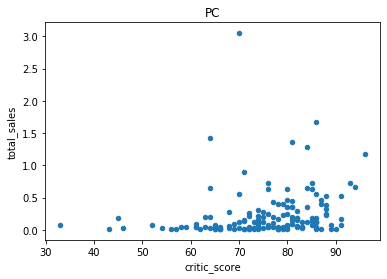

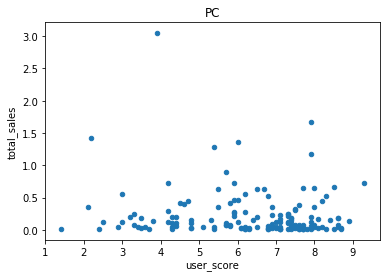

In [41]:
data = data.dropna(subset = ['critic_score','user_score'])
for item in data['platform'].unique():
    data[data['platform']==item].plot(x='critic_score', y='total_sales', kind='scatter', title=item)
    data[data['platform']==item].plot(x='user_score', y='total_sales', kind='scatter', title=item)
    print('Платформа', item)
    print('Кореляция продаж и рейтинга критиков', data[data['platform']==item]['total_sales'].corr(data[data['platform']==item]['critic_score']))
    print('Кореляция продаж и рейтинга пользователей', data[data['platform']==item]['total_sales'].corr(data[data['platform']==item]['user_score']))
    plt.show()

Платформы PS4 и XOne очень похожи: зависимость продаж от отзывов прользователей отсутстствует, а зависимость продаж от отзывов экспертов есть, но умеренная. Это достаточно новые игровые платформы, вероятно их пользователи доверяют критикам, но мало обращают внимания на мнение других пользователей. Пользователи платформа 3DS прислушиваются к мнению и критиков и других пользователей. Платформа PC похожа на платформы PS4 и XOne, но зависимость продаж от отзывов экспертов меньше. На всех распределениях мы наблюдаем большое количество игр с малыми продажами, но разными рейтингами. Вспоминаем, что столбцы с рейтингами были заполнены не полностью возможно у нас недостаточно данных по рейтингам.

In [42]:
#Считаю распр игр по жанрам .sort_values(by = 'total_sales', ascending = False)
data.groupby('genre')['total_sales'].sum().sort_values(ascending = False)


genre
Action          129.24
Shooter         120.16
Sports           84.13
Role-Playing     41.57
Racing           18.83
Platform         11.20
Simulation       11.18
Misc             10.39
Fighting          9.54
Adventure         6.39
Strategy          5.80
Puzzle            0.94
Name: total_sales, dtype: float64

Самые прибыльные жанры игр Action, Shooter, Role-Playing, Sports. Продажи в этих жанрах в несколько раз выше чем в других. Самые низкие продажи в жанрах Puzzle и Strategy.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

##  Шаг 5. Составляю портрет пользователя каждого региона

In [43]:
# 2 функции для определения 5 самых популярных жанров и платформ в регионе
def top_genre(region):
    print(region)
    print(df.groupby('genre')[region].sum().sort_values(ascending = False).head(5))
    df.groupby('genre')[region].sum().sort_values(ascending = False).head(12).plot(x='genre', kind='bar', title=region)
    plt.ylabel("продажи")
    plt.show()
def top_platform(region):
    print(region)
    print(df.groupby('platform')[region].sum().sort_values(ascending = False).head(5))
    df.groupby('platform')[region].sum().sort_values(ascending = False).head(15).plot(x='platform', kind='bar', title=region)
    plt.ylabel("продажи")
    plt.show()

na_sales
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


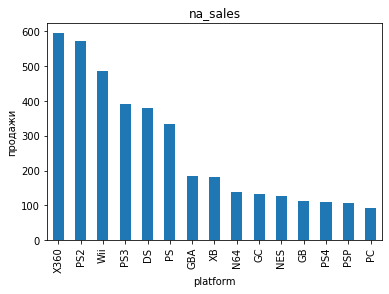

eu_sales
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


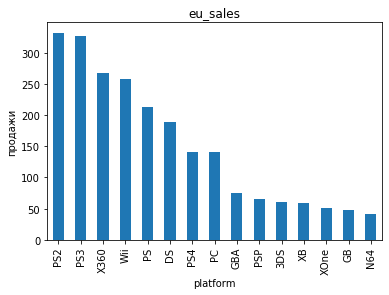

jp_sales
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


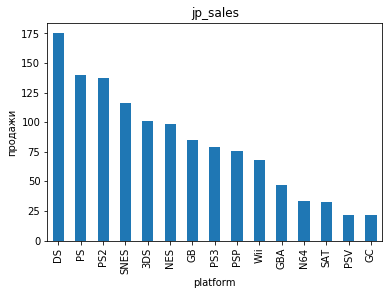

In [44]:
reg_list = ['na_sales', 'eu_sales', 'jp_sales']
for reg in reg_list:
    top_platform(reg)

В регонах NA, EU, JP очень разнные предпочтения по игровым платформам. Единственная платформа популярная везде PS2.

na_sales
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


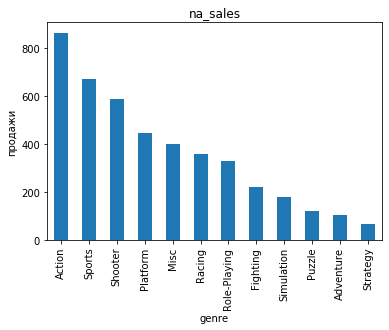

eu_sales
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


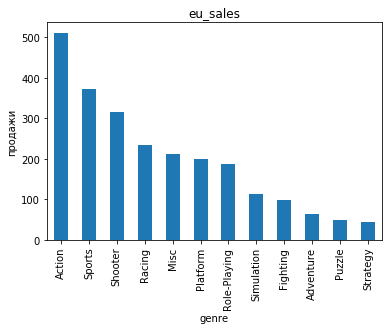

jp_sales
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


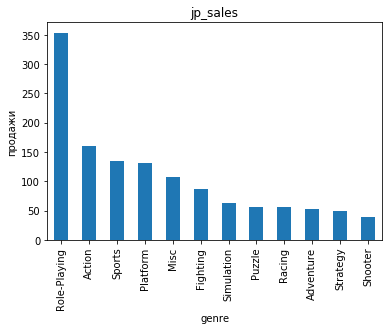

In [45]:
for reg in reg_list:
    top_genre(reg)

В регонах NA, EU, JP похожие предпочтения по жанрам игр. Во всех регионах любят Action, Sports, Misc. В регионах NA, EU также любят жанр Shooter, а в NA и JP популярен жанр Platform. Role-Playing самый популярны жанр в регионе JP.

In [46]:
#изучаю влияние рейтинга ESRB в разных регионах.
df.groupby('rating')[reg_list].sum()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1274.24,703.87,197.96
E10+,345.50,183.35,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,742.89,480.00,63.58
RP,0.00,0.03,0.00
T,747.60,421.79,150.70
unknown,1225.84,609.65,836.74


ничего не понятно

In [47]:
# Добавляю в датафрейм столбцамы продаж в процентах от суммарной продажи в регионе для изучения влияниия рейтинга ESRB в разных регионах
df['na_sales_norm'] = df['na_sales'] / df['na_sales'].sum() * 100
df['eu_sales_norm'] = df['eu_sales'] / df['eu_sales'].sum() * 100
df['jp_sales_norm'] = df['jp_sales'] / df['jp_sales'].sum() * 100
df['total_sales_norm'] = df['total_sales'] / df['total_sales'].sum() * 100

In [48]:
df.groupby('rating')['na_sales_norm', 'eu_sales_norm', 'jp_sales_norm', 'total_sales_norm'].sum()

,na_sales_norm,eu_sales_norm,jp_sales_norm,total_sales_norm
rating,,,,
AO,0.029023,0.025420,0.000000,0.022236
E,29.350765,29.331828,15.338127,27.314601
E10+,7.958226,7.640602,3.114734,7.271989
EC,0.035242,0.004584,0.000000,0.019854
K-A,0.058967,0.011252,0.113122,0.049011
M,17.111682,20.002667,4.926238,16.592564
RP,0.000000,0.001250,0.000000,0.000454
T,17.220172,17.576927,11.676378,16.712255
unknown,28.235923,25.405471,64.831401,32.017036


Text(0.5, 0, 'Проценты от продажи в регионе')

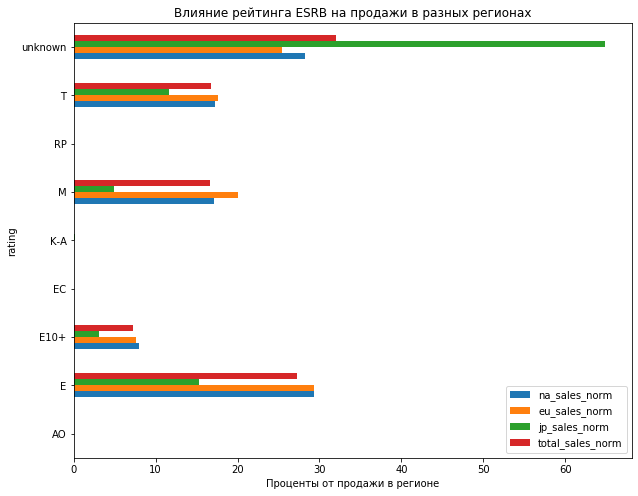

In [49]:
df.groupby('rating')['na_sales_norm', 'eu_sales_norm', 'jp_sales_norm', 'total_sales_norm'].sum().plot.barh(figsize=(10, 8))
plt.title("Влияние рейтинга ESRB на продажи в разных регионах")
plt.xlabel("Проценты от продажи в регионе")

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Круто, ты заметил важную особенность данных - большая часть игр японского региона не имеет рейтингов. Как думаешь, почему мы получаем такой результат?
</div>

В региоах NA, EU одинаковое распределение продаж в разрезе влияния рейтинга ESRB. Можно предположить, что в этих регионих люди мало обращают внимание на этот рейтинг. В регионе JP игры с рейтингами E, M и T покупают меньше, зато повышен интерес к играм с неустановленным рейтингом ESRB.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Крайне не хватает графиков в данном разделе работы. 

</div>

## Шаг 6. Провожу исследование статистических показателей

In [50]:
#Подготвавливаю данные для работы с рейтингами
data_score = df.dropna(subset = ['critic_score','user_score'])

In [51]:
data_score.groupby('genre')['critic_score'].count().sort_values(ascending = False)

genre
Action          1644
Sports           951
Shooter          868
Role-Playing     715
Racing           586
Platform         403
Misc             386
Fighting         379
Simulation       302
Strategy         278
Adventure        264
Puzzle           118
Name: critic_score, dtype: int64

In [52]:
data_score.groupby('genre')['user_score'].count().sort_values(ascending = False)

genre
Action          1644
Sports           951
Shooter          868
Role-Playing     715
Racing           586
Platform         403
Misc             386
Fighting         379
Simulation       302
Strategy         278
Adventure        264
Puzzle           118
Name: user_score, dtype: int64

Будем исследовать пять жанров на которые больше всего оценок Action, Sports, Shooter, Role-Playing, Racing. Так же это сымые популярные жанры.

In [53]:
#фукции для построения гистограмм и вычислений
def score_proc_user(gen):
    print(gen)
    print('Оценка пользователей')
    print('Среднее значение',  data_score[data_score['genre'] == gen]['user_score'].mean())
    print('Дисперсия',  np.var(data_score[data_score['genre'] == gen]['user_score']))
    print('Стандартное отклонение',  np.sqrt(np.var(data_score[data_score['genre'] == gen]['user_score'])))
    data_score[data_score['genre'] == gen]['user_score'].hist(bins=20)
    plt.title("Гистограмма рейтинга пользователей жанр " + gen)
    plt.xlabel("Рейтинг")
    plt.ylabel("Кол-во значений")
    plt.show()
    
def score_proc_critic(gen):
    print(gen)
    print('Оценка критиков')
    print('Среднее значение',  data_score[data_score['genre'] == gen]['critic_score'].mean())
    print('Дисперсия',  np.var(data_score[data_score['genre'] == gen]['critic_score']))
    print('Стандартное отклонение',  np.sqrt(np.var(data_score[data_score['genre'] == gen]['critic_score'])))
    data_score[data_score['genre'] == gen]['critic_score'].hist(bins=25)
    plt.title("Гистограмма рейтинга критиков жанр " + gen)
    plt.xlabel("Рейтинг")
    plt.ylabel("Кол-во значений")
    plt.show()
    


Action
Оценка пользователей
Среднее значение 7.099452554744525
Дисперсия 1.9410885080895803
Стандартное отклонение 1.3932295245542208


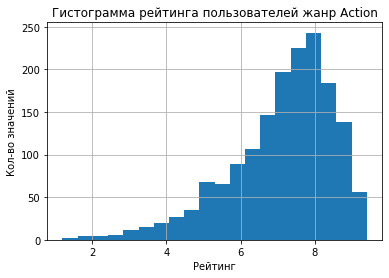

Sports
Оценка пользователей
Среднее значение 7.097896950578338
Дисперсия 2.1270618232399126
Стандартное отклонение 1.4584450017878332


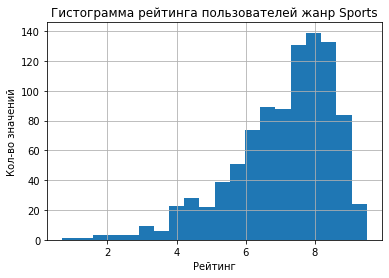

Shooter
Оценка пользователей
Среднее значение 7.089285714285714
Дисперсия 2.1837907340355494
Стандартное отклонение 1.4777654529848603


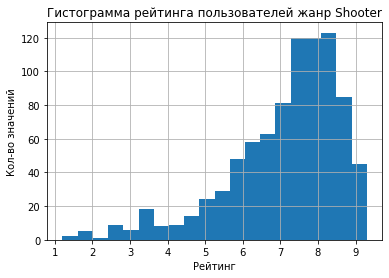

Role-Playing
Оценка пользователей
Среднее значение 7.620979020979021
Дисперсия 1.1710004401193213
Стандартное отклонение 1.0821277374318252


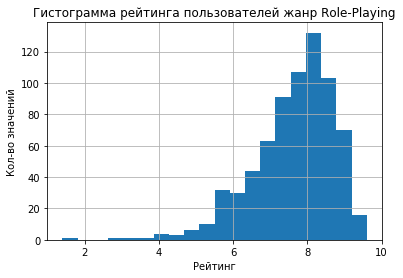

Racing
Оценка пользователей
Среднее значение 7.110750853242322
Дисперсия 2.125771791168214
Стандартное отклонение 1.458002671865938


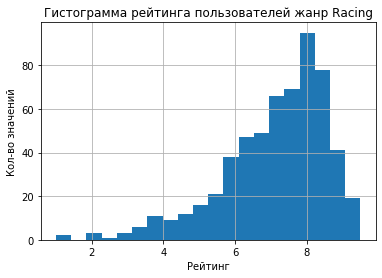

In [54]:
genre_list = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing']
for gen in genre_list:
    score_proc_user(gen)

Распределение оценок пользователей в каждом жанре игр примерно одинаков, средние значения и дисперсия приблизительно равны, все гистограммы с отрицательной скошенностью. Гистограммы имеют по одному пику, можно предположить что  оценки пользователей собирают достаточно честно. Выделяется только жанр Role-Playing среднее значение выше, дисперсия меньше. Вероятно сущесвует много фанатов именно этого жанра.

Action
Оценка критиков
Среднее значение 67.83698296836982
Дисперсия 203.34082204107244
Стандартное отклонение 14.2597623416757


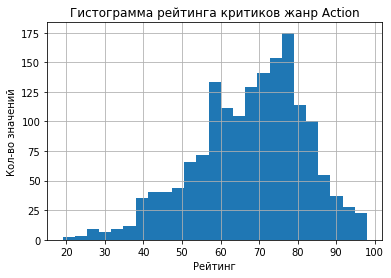

Sports
Оценка критиков
Среднее значение 74.07045215562566
Дисперсия 176.50081987967727
Стандартное отклонение 13.285361112129292


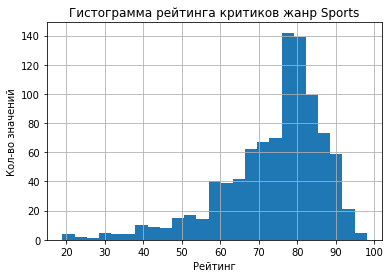

Shooter
Оценка критиков
Среднее значение 70.96889400921658
Дисперсия 206.32506928369682
Стандартное отклонение 14.364019955558987


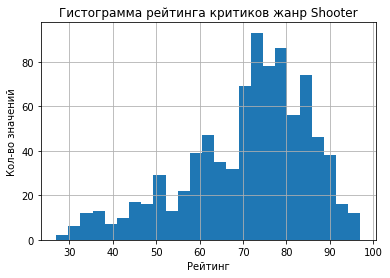

Role-Playing
Оценка критиков
Среднее значение 72.82377622377622
Дисперсия 143.4290850408333
Стандартное отклонение 11.97618825172823


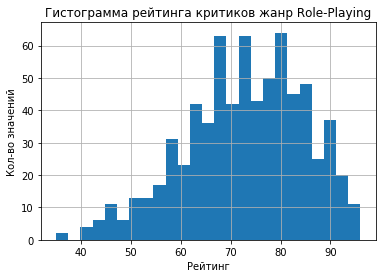

Racing
Оценка критиков
Среднее значение 69.62116040955631
Дисперсия 198.78822117904693
Стандартное отклонение 14.099227680232946


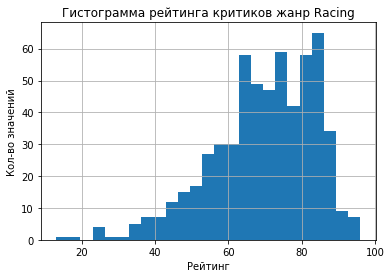

In [55]:
for gen in genre_list:
    score_proc_critic(gen)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

По каждому графику работы проверь подписи осей, а также названия рисунков. Без этого порой сложно понять, что именно мы анализируем. 

</div>

Распределение оценок критиков в каждом жанре игр примерно одинаков, средние значения и дисперсия приблизительно равны, все гистограммы с отрицательной скошенностью. Гистограммы имеют по несколько пиков, можно предположить что  среди критиков есть выраженные отдельные течения или при сборе оценок возожны какие-то нарушения.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ проведен. Как думаешь, почему по большинству жанров мы получаем скошенные влево распределения?

</div>

<div class="alert alert-block alert-info">В данных по рейтингам есть выбросы в сторону 0</div>

## Шаг 7. Проверяю гипотезы

Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Нулевая гипотеза $H_0$ $\mu_{Xbox One} = \mu_{PC}$

Альтернативная гипотеза $H_1$ $\mu_{Xbox One} \neq \mu_{PC}$

Критический уровень статистической значимости примем $\alpha = 0,05$

In [56]:
alpha = 0.05
results = st.ttest_ind(
    data_score[data_score['platform'] == 'XOne']['user_score'], 
    data_score[data_score['platform'] == 'PC']['user_score']
)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00010211482734739934
Отвергаем нулевую гипотезу


Вероятность получить наблюдаемые значения рейтингов
при условии, что нулевая гипотеза верна (p-значение) мало. Следовательно отвергаем нулевую гипотезу

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно. 

</div>

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза $H_0$ $\mu_{Action} = \mu_{Sports}$

Альтернативная гипотеза $H_1$ $\mu_{Action} \neq \mu_{Sports}$

Критический уровень статистической значимости примем $\alpha = 0,05$

In [57]:
alpha = 0.05
results = st.ttest_ind(
    data_score[data_score['genre'] == 'Action']['user_score'], 
    data_score[data_score['genre'] == 'Sports']['user_score']
)

print('Вероятность равенства средних (p-значение):', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вероятность равенства средних (p-значение): 0.9785200320585197
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Нулевая гипотеза всегда формулируется с учетом знака равенства. При получении pvalue меньше alpha, мы jnrлоняем нулевую гипотезу в пользу альтернативной. 
</div>

Не получилось отвергнуть нулевую гипотезу. С большой вероятностью средние пользовательские рейтинги жанров Action и Sports равны. Следовательно мы можем отвергнуть альтернатовную гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

## Шаг 8. Вывод

В 2016 году продаются игры на семи платформах, причем продажи на платформах Wii и X360 падают и незначительны. На платформах 3DS, PC, PS3 падают, а на платформах PS4 и XOne растут. Лидируют по продажам PS4, XOne, 3DS и PC. Потенцильно прибыльные платформы PS4, XOne и PC.Самые большие объемы продаж на у платформы PS4.
Продажи не зависят от рейтинга у пользователей, но зависят от рейтинга у критиков. Нужно учитывать что в распределение рейтингов у критиков есть аномалии, поэтому рейтинги у критиков могут быть неожиданными.
Во всех регионах любят жанры игр Action, Sports, Misc. В регионах NA, EU также любят жанр Shooter, а в NA и JP популярен жанр Platform. Role-Playing самый популярны жанр в регионе JP.
В региоах NA, EU одинаковое распределение продаж в разрезе влияния рейтинга ESRB. Можно предположить, что в этих регионих люди мало обращают внимание на этот рейтинг. В регионе JP игры с рейтингами E, M и T покупают меньше, зато повышен интерес к играм с неустановленным рейтингом ESRB.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы. Еще лучше будет, если приведешь рекомендации для компании по дальнейшим действиям. 

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>